# COVID 19: Data Analysis and Visualization

In this project we are going to work with COVID19 dataset, published by John Hopkins University, which consist of the data related to cumulative number of confirmed cases, per day, in each Country. Also we have another dataset consist of various life factors, scored by the people living in each country around the globe.  We are going to merge these two datasets to see if there is any relationship between the spread of the virus in a country and how happy people are, living in that country. 

In this project we will answer our initial question: **Is there any relationship between the spread of the coronavirus in a country and how happy people are living in that country?**

In [55]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print('Modules are imported')

Modules are imported


## Task 1

### 1.1 Importing Covid19  dataset:

In [2]:
corona_dataset_csv = pd.read_csv('Datasets/covid19_Confirmed_dataset.csv')
corona_dataset_csv.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0     1463     1531     1703     1828     1939     2171  
1      712      726      736      750      766      773  
2     3256     3382     3517     3649     3848     4006  
3      738      738      743      743      743      745  
4       25       26       27       27       27       27  

[5 rows x 104 columns]

Let's check the shape of our dataframe

In [3]:
corona_dataset_csv.shape # Shape of the dataframe

(266, 104)

In [4]:
corona_dataset_csv.info() # Information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.2+ KB


### 1.2 Delete irrelevant columns

There are some columns in our dataframe that are irrelevant given the scope of this project, therefore it would be best practice to get rid of the columns latitude and longitude.

In [5]:
corona_dataset_csv.drop(['Lat', 'Long'], axis = 1, inplace = True)
corona_dataset_csv.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0     1463     1531     1703     1828     1939     2171  
1      712      726      736      750      766      773  
2     3256     3382     3517     3649     3848     4006  
3      738      738      743      743      743      745  
4       25       26       27       27       27       27  

[5 rows x 102 columns]

### 1.3 Aggregating rows by country

There are some countries which information is fragmented among their provinces/states, we need to have all that information in just one country, so we will aggregate all the fragmented data in the Province/State column into their corresponding country

In [6]:
corona_dataset_aggregated = corona_dataset_csv.groupby('Country/Region').sum()

In [7]:
corona_dataset_aggregated.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  4/21/20  4/22/20  4/23/20  \
Country/Region                             ...                              
Afghanistan           0        0        0  ...     1092     1176     1279   
Albania               0        0        0  ...      609      634      663   
Algeria               0        0        0  ...     2811     2910     3007   
Andorra               0        0        0  ...      717      723      723   
Angola                0        0        0  ...       24       25       25   

                4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
Country/Region                                                                 
Afghanistan        1351     1463     1531     1703     1828     1939     2171  
Albania             678      712      726      736      750      766      773  
Algeria            3127     3256     3382     3517     3649     3848     4006  
Andorra             731      738      738      743      743      743      745  
Angola               25       25       26       27       27       27       27  

[5 rows x 100 columns]

Notice that the index column has changed into Country/Region

In [8]:
corona_dataset_aggregated.shape

(187, 100)

### 1.3 Visualizing data related to Spain

Visualization always helps for better understanding of our data. Let's plot the cumulative frequency of cases in Spain and see how it looks like

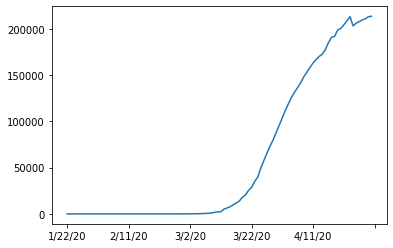

In [9]:
corona_dataset_aggregated.loc['Spain'].plot()

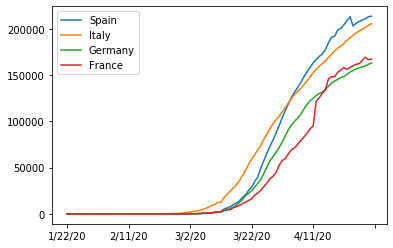

In [10]:
# We can also compare it to other countries, for example:

corona_dataset_aggregated.loc['Spain'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Germany'].plot()
corona_dataset_aggregated.loc['France'].plot()
plt.legend()

## Task 2: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country.

Let's check how the virus spreaded in China:

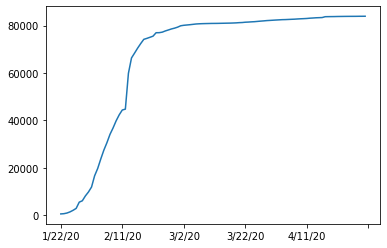

In [11]:
corona_dataset_aggregated.loc['China'].plot()

Now let's check how it spreaded during the first 15 days recorded on the dataset:

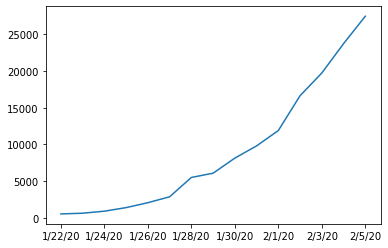

In [12]:
corona_dataset_aggregated.loc['China'][:15].plot()

There are differences in the slope, that means that in some days there are more cases registered than other days.

In the absence of a better index, let's choose the maximum number of new cases in one day as our measure.

### Task 2.1 Calculating and plotting the first derivative of the curve

In order to calculate the rate of this curve, we can calculate the first derivative of the curve and plot it:

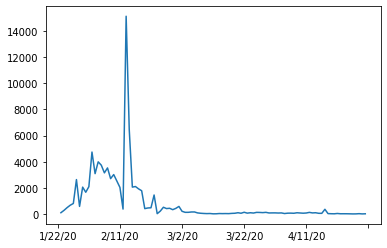

In [13]:
corona_dataset_aggregated.loc['China'].diff().plot()

This plot, shows the change on the infection rate

### Task 2.2 Find the maximum of infection rate for China, Italy and Spain

In [14]:
# Let's find the maximum of the first derivative

corona_dataset_aggregated.loc['China'].diff().max()

15136.0

This number means that during a 24 hours time there were 15,136 new infected cases were recorded

In [15]:
# Let's do the same for Italy and for Spain:

corona_dataset_aggregated.loc['Spain'].diff().max()

9630.0

In [16]:
corona_dataset_aggregated.loc['Italy'].diff().max()

6557.0

The maximum of new infected cases in a single day were 9,630 and 6,557 for Spain and Italy respectively

### Task 2.3 Find maximum infection rate for all countries. 

In [17]:
# Let's create a list with all the countries using the dataframe indexes

countries = list(corona_dataset_aggregated.index)

# Now an empty list for the maximum rate:

max_rate = []

# Let's populate the list using a for loop comprehension:

[max_rate.append(corona_dataset_aggregated.loc[c].diff().max()) for c in countries]

# Now let's take this list and make it an additional column to our datafram:

corona_dataset_aggregated['Max. Infection Rate'] = max_rate

In [18]:
corona_dataset_aggregated.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  4/22/20  4/23/20  4/24/20  \
Country/Region                             ...                              
Afghanistan           0        0        0  ...     1176     1279     1351   
Albania               0        0        0  ...      634      663      678   
Algeria               0        0        0  ...     2910     3007     3127   
Andorra               0        0        0  ...      723      723      731   
Angola                0        0        0  ...       25       25       25   

                4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  \
Country/Region                                                         
Afghanistan        1463     1531     1703     1828     1939     2171   
Albania             712      726      736      750      766      773   
Algeria            3256     3382     3517     3649     3848     4006   
Andorra             738      738      743      743      743      745   
Angola               25       26       27       27       27       27   

                Max. Infection Rate  
Country/Region                       
Afghanistan                   232.0  
Albania                        34.0  
Algeria                       199.0  
Andorra                        43.0  
Angola                          5.0  

[5 rows x 101 columns]

### Task 2.4 Create a new dataframe with only the column 'Max. Infection Rate'

In [19]:
corona_data_max_rate = pd.DataFrame(corona_dataset_aggregated['Max. Infection Rate'])

corona_data_max_rate.head()

Max. Infection Rate
Country/Region                     
Afghanistan                   232.0
Albania                        34.0
Algeria                       199.0
Andorra                        43.0
Angola                          5.0

## Task 3
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 3.1 Importing the dataset

In [20]:
happiness_report_csv = pd.read_csv('Datasets/worldwide_happiness_report.csv')

happiness_report_csv.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

### Task 3.2 Dropping the columns we don't need

In [21]:
irrelevant_columns = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']

happiness_report_csv.drop(irrelevant_columns, axis = 1, inplace = True)

happiness_report_csv.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0           Finland           1.340           1.587                    0.986   
1           Denmark           1.383           1.573                    0.996   
2            Norway           1.488           1.582                    1.028   
3           Iceland           1.380           1.624                    1.026   
4       Netherlands           1.396           1.522                    0.999   

   Freedom to make life choices  
0                         0.596  
1                         0.592  
2                         0.603  
3                         0.591  
4                         0.557

### Task 3.3 Changing the indices of the dataframe

Let's change the indices to countries so both dataframes have the same indices, so we can merge both dataframes more easily

In [22]:
happiness_report_csv.set_index('Country or region', inplace = True)

happiness_report_csv.head()

GDP per capita  Social support  Healthy life expectancy  \
Country or region                                                            
Finland                     1.340           1.587                    0.986   
Denmark                     1.383           1.573                    0.996   
Norway                      1.488           1.582                    1.028   
Iceland                     1.380           1.624                    1.026   
Netherlands                 1.396           1.522                    0.999   

                   Freedom to make life choices  
Country or region                                
Finland                                   0.596  
Denmark                                   0.592  
Norway                                    0.603  
Iceland                                   0.591  
Netherlands                               0.557

### Task 3.4 Merging both dataframes:

In [23]:
corona_data_max_rate.shape

(187, 1)

In [24]:
happiness_report_csv.shape

(156, 4)

There is discordance between the number of indices we have, therefore we need to perform an inner join so only shared indices will join

In [25]:
# To perform the join we use the .join() built-in function and set it to 'inner' in the how parameter:

data = corona_data_max_rate.join(happiness_report_csv, how = 'inner')
data.head()

Max. Infection Rate  GDP per capita  Social support  \
Afghanistan                232.0           0.350           0.517   
Albania                     34.0           0.947           0.848   
Algeria                    199.0           1.002           1.160   
Argentina                  291.0           1.092           1.432   
Armenia                    134.0           0.850           1.055   

             Healthy life expectancy  Freedom to make life choices  
Afghanistan                    0.361                         0.000  
Albania                        0.874                         0.383  
Algeria                        0.785                         0.086  
Argentina                      0.881                         0.471  
Armenia                        0.815                         0.283

### Task 3.5 Correlation matrix

Now, it would be interesting to check if there is any correlation between the maximum infection rate number and the other variables, we will create a correlation matrix for that purpose

In [26]:
data.corr()

Max. Infection Rate  GDP per capita  \
Max. Infection Rate                      1.000000        0.250118   
GDP per capita                           0.250118        1.000000   
Social support                           0.191958        0.759468   
Healthy life expectancy                  0.289263        0.863062   
Freedom to make life choices             0.078196        0.394603   

                              Social support  Healthy life expectancy  \
Max. Infection Rate                 0.191958                 0.289263   
GDP per capita                      0.759468                 0.863062   
Social support                      1.000000                 0.765286   
Healthy life expectancy             0.765286                 1.000000   
Freedom to make life choices        0.456246                 0.427892   

                              Freedom to make life choices  
Max. Infection Rate                               0.078196  
GDP per capita                                    0.394603  
Social support                                    0.456246  
Healthy life expectancy                           0.427892  
Freedom to make life choices                      1.000000

## Task 4 Visualizing the results

We need to visualize the results in terms figures and graphs so it can be better understood

### Task 4.1: Plotting GDP per capita vs maximum Infection rate

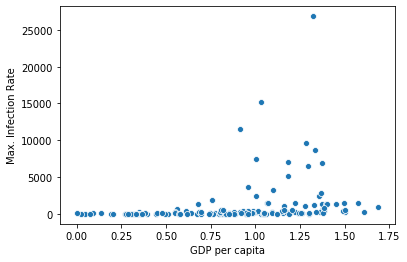

In [27]:
x = data['GDP per capita']
y = data['Max. Infection Rate']

# Let's use the seaborn scatterplot to see the relation both variables have, if there is any:

sns.scatterplot(x,y)

As we can see, most of the data is concentrated on the low end of the Max. Infection Rate, the plot isn't very conclusive as the extreme outliers have made it hard to see any relevant differences among most of the countries

We could change the scaling using the scaling for a clearer view, for example representing the y axis using a logarithmic scale, with the logarithmic scale we can also counter the differences between population among countries

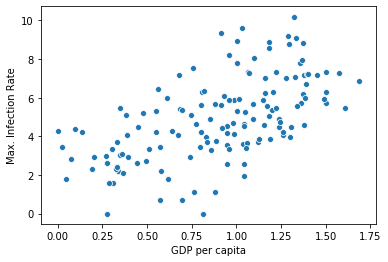

In [28]:
sns.scatterplot(x,np.log(y))

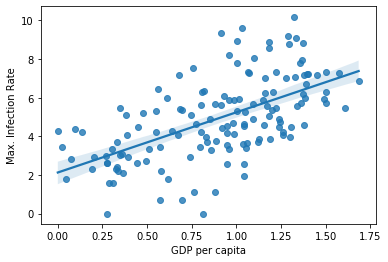

In [29]:
# We can fit a best fit line in the scatterplot as well:

sns.regplot(x, np.log(y))

The line draws a line with a positive slope, this means there is a slightly positive correlation (~0.25 as we saw earlier)

### Task 4.2 Plotting social support vs maximum Infection rate



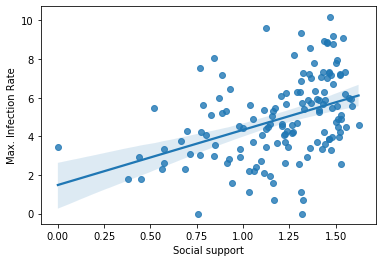

In [30]:
x = data['Social support']
y = data['Max. Infection Rate']
sns.regplot(x,np.log(y))

Positive slope, meaning positive correlation (~0.20 as we saw previously)

### Task 4.3 Plotting healthy life expectancy vs maximum infection rate:

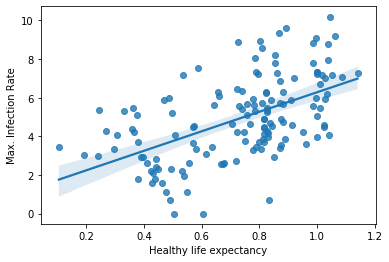

In [31]:
x = data['Healthy life expectancy']
y = data['Max. Infection Rate']
sns.regplot(x,np.log(y))

The line draws a line with a positive slope, this means there is a slightly positive correlation (~0.30 as we saw earlier)

In total, there seems to be a correlation between less developed countries and having a smaller new cases rate, this could be explained by less developed countries not carrying out as many tests as more developer countries do, for that reason, it would be interesting to check this information using the number of deaths

### Task 5 Compare these variables with the numbers of death and maximum death rate by country

In [32]:
# Let's load the dataset for deaths

data_deaths = pd.read_csv('Dataset for practice/covid19_deaths_dataset.csv')
data_deaths.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...       36       40       42       43   
1        0        0        0  ...       26       27       27       27   
2        0        0        0  ...      392      402      407      415   
3        0        0        0  ...       37       37       37       40   
4        0        0        0  ...        2        2        2        2   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0       47       50       57       58       60       64  
1       27       28       28       30       30       31  
2      419      425      432      437      444      450  
3       40       40       40       41       42       42  
4        2        2        2        2        2        2  

[5 rows x 104 columns]

In [33]:
# Getting read of innecessary columns:

data_deaths.drop(['Lat', 'Long'], axis = 1, inplace = True)

In [34]:
# Getting read of innecessary columns:

data_deaths_grouped = data_deaths.groupby('Country/Region').sum()
data_deaths_grouped.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  4/21/20  4/22/20  4/23/20  \
Country/Region                             ...                              
Afghanistan           0        0        0  ...       36       40       42   
Albania               0        0        0  ...       26       27       27   
Algeria               0        0        0  ...      392      402      407   
Andorra               0        0        0  ...       37       37       37   
Angola                0        0        0  ...        2        2        2   

                4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
Country/Region                                                                 
Afghanistan          43       47       50       57       58       60       64  
Albania              27       27       28       28       30       30       31  
Algeria             415      419      425      432      437      444      450  
Andorra              40       40       40       40       41       42       42  
Angola                2        2        2        2        2        2        2  

[5 rows x 100 columns]

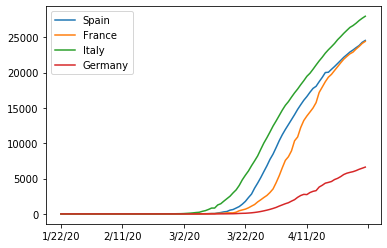

In [35]:
# Plotting deaths in several countries in order to have a general idea on deaths by covid19

data_deaths_grouped.loc['Spain'].plot()
data_deaths_grouped.loc['France'].plot()
data_deaths_grouped.loc['Italy'].plot()
data_deaths_grouped.loc['Germany'].plot()
plt.legend()

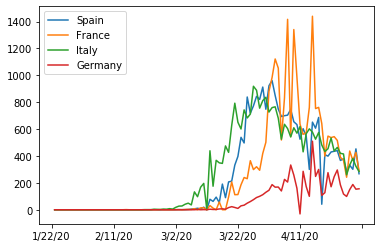

In [36]:
# Calculating the derivative of the curves to see where the maximums of deaths in one day are:

data_deaths_grouped.loc['Spain'].diff().plot()
data_deaths_grouped.loc['France'].diff().plot()
data_deaths_grouped.loc['Italy'].diff().plot()
data_deaths_grouped.loc['Germany'].diff().plot()
plt.legend()

In [37]:
# Let's create a list with all the countries using the dataframe indexes

countries = list(data_deaths_grouped.index)

# Now an empty list for the maximum rate:

max_rate = []

# Let's populate the list using a for loop comprehension:

[max_rate.append(data_deaths_grouped.loc[c].diff().max()) for c in countries]

# Now let's take this list and make it an additional column to our datafram:

data_deaths_grouped['Max. Daily Deaths Rate'] = max_rate

# Creation of a new dataframe with just the maximum of deaths in one day per country:

deaths_max_rate = pd.DataFrame(data_deaths_grouped['Max. Daily Deaths Rate'])

deaths_max_rate.head()

Max. Daily Deaths Rate
Country/Region                        
Afghanistan                        7.0
Albania                            4.0
Algeria                           30.0
Andorra                            4.0
Angola                             2.0

In [38]:
# let's merge Max. Daily Deaths Rate dataframe with the happiness report one, for that let's see their shape

print(happiness_report_csv.shape, '\n')

print(deaths_max_rate.shape)

(156, 4) 

(187, 1)


In [39]:
# Let's now merge both datasets using an inner join

data_deaths_covid = deaths_max_rate.join(happiness_report_csv, how = 'inner')
data_deaths_covid.head()

Max. Daily Deaths Rate  GDP per capita  Social support  \
Afghanistan                     7.0           0.350           0.517   
Albania                         4.0           0.947           0.848   
Algeria                        30.0           1.002           1.160   
Argentina                      13.0           1.092           1.432   
Armenia                         3.0           0.850           1.055   

             Healthy life expectancy  Freedom to make life choices  
Afghanistan                    0.361                         0.000  
Albania                        0.874                         0.383  
Algeria                        0.785                         0.086  
Argentina                      0.881                         0.471  
Armenia                        0.815                         0.283

In [40]:
# Correlation between the variables in this dataset:

data_deaths_covid.corr()

Max. Daily Deaths Rate  GDP per capita  \
Max. Daily Deaths Rate                      1.000000        0.259893   
GDP per capita                              0.259893        1.000000   
Social support                              0.204148        0.759468   
Healthy life expectancy                     0.309666        0.863062   
Freedom to make life choices                0.080166        0.394603   

                              Social support  Healthy life expectancy  \
Max. Daily Deaths Rate              0.204148                 0.309666   
GDP per capita                      0.759468                 0.863062   
Social support                      1.000000                 0.765286   
Healthy life expectancy             0.765286                 1.000000   
Freedom to make life choices        0.456246                 0.427892   

                              Freedom to make life choices  
Max. Daily Deaths Rate                            0.080166  
GDP per capita                                    0.394603  
Social support                                    0.456246  
Healthy life expectancy                           0.427892  
Freedom to make life choices                      1.000000

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


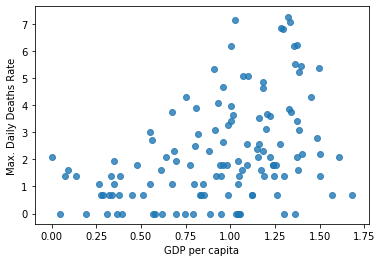

In [41]:
'''Plotting different variables against the maximum daily death rate by covid by country,
we will once again set the scale of the Max. Daily Deaths Rate to logarithmic for a clearer view 
and also countering at some point the difference of sizes of the population of the different countries'''

# Plotting GDP per capita against the Max. Daily Deaths Rate:

x = data_deaths_covid['GDP per capita']
y = data_deaths_covid['Max. Daily Deaths Rate']

sns.regplot(x, np.log(y))

In [44]:
# There are zero values that don't allow us to represent the data properly, let's get rid of them:

data_nz = data_deaths_covid[(data_deaths_covid != 0).all(1)]
data_nz.shape

(126, 5)

Text(0.5, 1.0, 'GDP per capita vs Max. Daily Deaths Rate')

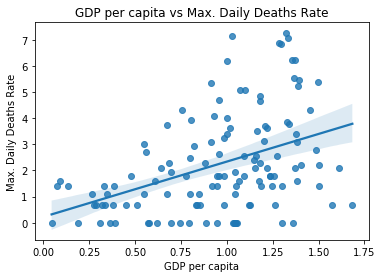

In [46]:
# Now we should be able to plot it without any problems:

x = data_nz['GDP per capita']
y = data_nz['Max. Daily Deaths Rate']
sns.regplot(x, np.log(y))
plt.title('GDP per capita vs Max. Daily Deaths Rate')

Text(0.5, 1.0, 'Healthy Life Expectancy vs Max. Daily Deaths Rate')

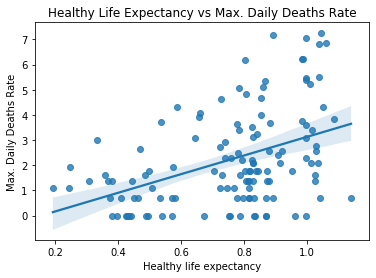

In [47]:
# Plotting Healthy life excpectancy against the Max. Daily Deaths Rate:

x = data_nz['Healthy life expectancy']
y = data_nz['Max. Daily Deaths Rate']
sns.regplot(x, np.log(y))
plt.title('Healthy Life Expectancy vs Max. Daily Deaths Rate')

We can see that there isn't a significant difference between in the correlation indices obtained from the maximum new cases rate and the maximum new deaths rate, so we can conclude that it seems there is a correlation between developed countries and having more cases of coronavirus.

It could also be, that the covid-19 first spreaded in more globalized and developed countries and then spreaded over other less developed countries, given that our data only covers the very first months of the pandemic it would be interesting to use up to date data to draw better conclusions

# More data visualization

For this part of the project, we are going to use an up to date dataset with the confirmed cases, recovered and deaths for every day since the 22nd of January 2020

## Task 1 Loading and checking the dataset  

In [49]:
# URL: 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')
df.head()

Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0

In [52]:
df.tail()

Date   Country  Confirmed  Recovered  Deaths
63216  2020-12-13  Zimbabwe      11246       9451     307
63217  2020-12-14  Zimbabwe      11358       9554     309
63218  2020-12-15  Zimbabwe      11522       9599     310
63219  2020-12-16  Zimbabwe      11749       9702     313
63220  2020-12-17  Zimbabwe      11866       9836     314

In [50]:
# Checking how many rows and columns we have

df.shape

(63221, 5)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63221 entries, 0 to 63220
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       63221 non-null  object
 1   Country    63221 non-null  object
 2   Confirmed  63221 non-null  int64 
 3   Recovered  63221 non-null  int64 
 4   Deaths     63221 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ MB


## Task 2 Visualizing the global spread of COVID-19 from first day of the pandemic

In [53]:
'''We are interested in the data from every country since the pandemic started in those countries,
for that reason it would be necessary to get rid of all those days were 0 cases were reported at the
beginning'''

df = df[df.Confirmed > 0]

df.shape

(54122, 5)

In [54]:
# Let's check some data related to Spain:

df[df.Country == 'Spain']

Date Country  Confirmed  Recovered  Deaths
53301  2020-02-01   Spain          1          0       0
53302  2020-02-02   Spain          1          0       0
53303  2020-02-03   Spain          1          0       0
53304  2020-02-04   Spain          1          0       0
53305  2020-02-05   Spain          1          0       0
...           ...     ...        ...        ...     ...
53617  2020-12-13   Spain    1730575     150376   47624
53618  2020-12-14   Spain    1751884     150376   48013
53619  2020-12-15   Spain    1762212     150376   48401
53620  2020-12-16   Spain    1773290     150376   48596
53621  2020-12-17   Spain    1785421     150376   48777

[321 rows x 5 columns]

In [107]:
# Let's see the spread of the virus worldwide using choropleth from the plotly library:

fig = px.choropleth(df, locations = 'Country', locationmode = 'country names', color = 'Confirmed',
                   animation_frame = 'Date')
fig.update_layout(title_text = 'Global Spread of COVID-19')
fig.show()

In [62]:
# Let's see the global deaths:

fig = px.choropleth(df, locations = 'Country', locationmode = 'country names', color = 'Deaths',
                   animation_frame = 'Date')
fig.update_layout(title_text = 'Global Deaths of COVID-19')
fig.show()

## Task 3 Visualizing how intensive COVID-19 transmission has been in each country

We have to calculate a measure that tells us how intensive was the spread of the virus in a certain country. 
The maximum daily infection rate could be a good measure for that.

In [61]:
# Let's start using Spain as an example:

df_spain = df[df.Country == 'Spain']
df_spain.head()

Date Country  Confirmed  Recovered  Deaths
53301  2020-02-01   Spain          1          0       0
53302  2020-02-02   Spain          1          0       0
53303  2020-02-03   Spain          1          0       0
53304  2020-02-04   Spain          1          0       0
53305  2020-02-05   Spain          1          0       0

In [67]:
# To calculate which day Spain confirmed more new cases in a day, we need to calculate the first derivation

df_spain['Infection rate'] = df_spain.Confirmed.diff()
df_spain.tail(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date Country  Confirmed  Recovered  Deaths  Infection rate
53612  2020-12-08   Spain    1702328     150376   46646             0.0
53613  2020-12-09   Spain    1712101     150376   47019          9773.0
53614  2020-12-10   Spain    1720056     150376   47344          7955.0
53615  2020-12-11   Spain    1730575     150376   47624         10519.0
53616  2020-12-12   Spain    1730575     150376   47624             0.0
53617  2020-12-13   Spain    1730575     150376   47624             0.0
53618  2020-12-14   Spain    1751884     150376   48013         21309.0
53619  2020-12-15   Spain    1762212     150376   48401         10328.0
53620  2020-12-16   Spain    1773290     150376   48596         11078.0
53621  2020-12-17   Spain    1785421     150376   48777         12131.0

In [74]:
px.line(df_spain, x = 'Date', y = ['Confirmed'])

In [72]:
px.line(df_spain, x = 'Date', y = ['Infection rate'])

In [75]:
#Let's see what's the maximum value of the infection rate in Spain:

df_spain['Infection rate'].max()

55019.0

55,019 new cases in one day was the maximum infection rate in Spain.

In [89]:
# Let's calculate the maximum infection rate for all countries

max_rate = [] # We need an empty list to populate with the maximum infection rates
countries = list(df['Country'].unique()) # A list of the countries in our datasets

In [90]:
# We use a comprehension list to iterate through all the countries and adding them to the max_rate list:

[max_rate.append(df[df.Country == c].Confirmed.diff().max()) for c in countries]

max_rate

[915.0,
 879.0,
 1133.0,
 299.0,
 355.0,
 39.0,
 18326.0,
 2476.0,
 716.0,
 9586.0,
 4451.0,
 310.0,
 841.0,
 4019.0,
 12.0,
 1975.0,
 23921.0,
 1382.0,
 139.0,
 29.0,
 2036.0,
 1953.0,
 1328.0,
 70574.0,
 26.0,
 4828.0,
 315.0,
 2158.0,
 78.0,
 159.0,
 31.0,
 2324.0,
 8377.0,
 216.0,
 83.0,
 13990.0,
 15136.0,
 13056.0,
 44.0,
 649.0,
 414.0,
 2877.0,
 430.0,
 4620.0,
 124.0,
 827.0,
 15731.0,
 4036.0,
 99.0,
 280.0,
 8.0,
 2147.0,
 11536.0,
 1774.0,
 885.0,
 1750.0,
 55.0,
 757.0,
 147.0,
 1829.0,
 5.0,
 840.0,
 106091.0,
 570.0,
 248.0,
 5450.0,
 33825.0,
 1513.0,
 3316.0,
 26.0,
 4233.0,
 278.0,
 156.0,
 133.0,
 332.0,
 7.0,
 1324.0,
 6819.0,
 106.0,
 97894.0,
 8369.0,
 14051.0,
 5055.0,
 1515.0,
 9078.0,
 40902.0,
 244.0,
 3199.0,
 7933.0,
 18757.0,
 1554.0,
 1078.0,
 2220.0,
 1073.0,
 11505.0,
 14.0,
 1040.0,
 2817.0,
 98.0,
 97.0,
 1639.0,
 52.0,
 4551.0,
 1967.0,
 7.0,
 614.0,
 257.0,
 2234.0,
 215.0,
 155.0,
 218.0,
 3.0,
 296.0,
 41.0,
 28115.0,
 1766.0,
 29.0,
 56.0,
 874.0,

In [ ]:
# Now let's create a new dataframe using the max_rate and countries lists as columns

In [102]:
df_MIR = pd.DataFrame()
df_MIR['Country'] = countries
df_MIR['MIR'] = max_rate
df_MIR.head()

Country     MIR
0  Afghanistan   915.0
1      Albania   879.0
2      Algeria  1133.0
3      Andorra   299.0
4       Angola   355.0

In [103]:
# Let's plot a barchart to see the different MIRs accross countries:

px.bar(df_MIR, x = 'Country', y = 'MIR' , color = 'Country', title = 'Global Maximum Infection Rate')

In [104]:
# Let's plot it again getting rid of extreme outliers, as these seem to be a product of corrections in the data:

df_MIR = df_MIR[df_MIR.MIR < 300000]

px.bar(df_MIR, x = 'Country', y = 'MIR' , color = 'Country', title = 'Global Maximum Infection Rate')

In [108]:
# Still the information is not presented clearly enough, so let's scale the y axis

px.bar(df_MIR, x = 'Country', y = 'MIR' , color = 'Country', title = 'Global Maximum Infection Rate', 
       log_y = True)